In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

# Load Dataset

In [2]:
dataset = pd.read_csv('datasets/IBM-Historical-Data.csv', index_col='Date', parse_dates=['Date'])

In [3]:
dataset.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-11-26,135.09,136.15,136.15,134.77,3.79M,-0.65%
2019-11-25,135.97,134.47,136.00,134.35,2.59M,1.21%
2019-11-22,134.34,134.19,134.65,133.59,3.30M,0.37%
2019-11-21,133.84,133.40,134.17,132.98,3.35M,0.48%
2019-11-20,133.20,134.06,134.46,132.75,4.14M,-0.98%


In [4]:
dataset = dataset.sort_index()
training_set = dataset[:'2015'].iloc[:,1:2].values
test_set = dataset['2016':].iloc[:,1:2].values

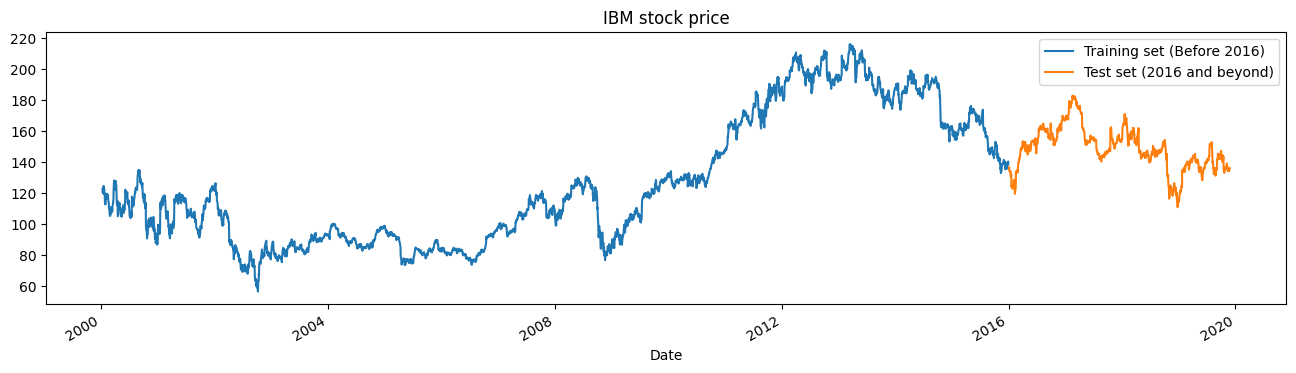

In [5]:
dataset["High"][:'2015'].plot(figsize=(16,4),legend=True)
dataset["High"]['2016':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2016)','Test set (2016 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [6]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [7]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
X_train = []
y_train = []
for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# GRU

In [10]:
model = Sequential()
model.add(GRU(62, return_sequences=True, input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train,y_train,epochs=15,batch_size=150)

Epoch 1/15
27/27 [==============================] - 5s 98ms/step - loss: 0.0276
Epoch 2/15
27/27 [==============================] - 3s 102ms/step - loss: 0.0019
Epoch 3/15
27/27 [==============================] - 3s 103ms/step - loss: 0.0013
Epoch 4/15
27/27 [==============================] - 3s 107ms/step - loss: 0.0012
Epoch 5/15
27/27 [==============================] - 3s 96ms/step - loss: 0.0012
Epoch 6/15
27/27 [==============================] - 3s 110ms/step - loss: 0.0011
Epoch 7/15
27/27 [==============================] - 3s 102ms/step - loss: 0.0012
Epoch 8/15
27/27 [==============================] - 3s 101ms/step - loss: 0.0012
Epoch 9/15
27/27 [==============================] - 3s 102ms/step - loss: 0.0011
Epoch 10/15
27/27 [==============================] - 3s 100ms/step - loss: 0.0011
Epoch 11/15
27/27 [==============================] - 3s 103ms/step - loss: 0.0010
Epoch 12/15
27/27 [==============================] - 3s 97ms/step - loss: 0.0010
Epoch 13/15
27/27 [=========

In [11]:
dataset_total = pd.concat((dataset["High"][:'2015'],dataset["High"]['2016':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [12]:
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

31/31 [==============================] - 1s 7ms/step


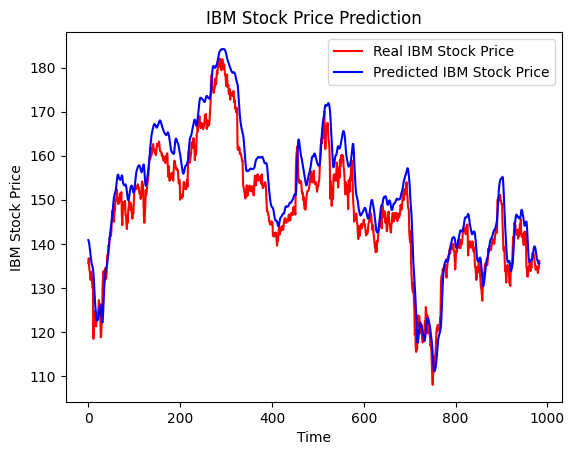

In [13]:
plot_predictions(test_set,predicted_stock_price)

In [14]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 5.159604159729403.


# LSTM

In [15]:
model = Sequential()
model.add(LSTM(62, return_sequences=True, input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train,y_train,epochs=15,batch_size=150)

Epoch 1/15
27/27 [==============================] - 5s 115ms/step - loss: 0.0268
Epoch 2/15
27/27 [==============================] - 3s 117ms/step - loss: 0.0037
Epoch 3/15
27/27 [==============================] - 3s 112ms/step - loss: 0.0023
Epoch 4/15
27/27 [==============================] - 3s 116ms/step - loss: 0.0020
Epoch 5/15
27/27 [==============================] - 3s 117ms/step - loss: 0.0017
Epoch 6/15
27/27 [==============================] - 3s 121ms/step - loss: 0.0015
Epoch 7/15
27/27 [==============================] - 3s 116ms/step - loss: 0.0015
Epoch 8/15
27/27 [==============================] - 3s 118ms/step - loss: 0.0014
Epoch 9/15
27/27 [==============================] - 3s 121ms/step - loss: 0.0013
Epoch 10/15
27/27 [==============================] - 3s 119ms/step - loss: 0.0013
Epoch 11/15
27/27 [==============================] - 3s 121ms/step - loss: 0.0013
Epoch 12/15
27/27 [==============================] - 3s 120ms/step - loss: 0.0012
Epoch 13/15
27/27 [======

In [16]:
lstm_predicted_stock_price = model.predict(X_test)
lstm_predicted_stock_price = sc.inverse_transform(lstm_predicted_stock_price)

31/31 [==============================] - 1s 8ms/step


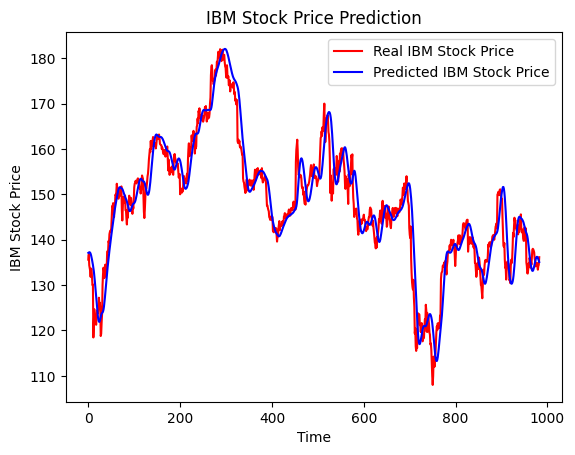

In [17]:
plot_predictions(test_set,lstm_predicted_stock_price)

In [18]:
return_rmse(test_set,lstm_predicted_stock_price)

The root mean squared error is 4.416507148976619.
